## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pyts.image import GramianAngularField

In [2]:
df = pd.read_csv("EEG_data.csv")

In [3]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [4]:
COL = 'Attention'
# COL = 'Mediation'
# COL = 'Alpha1'
# COL = 'Alpha2'
# COL = 'Beta1'
# COL = 'Beta2'
# COL = 'Gamma1'
# COL = 'Gamma2'
# COL = 'Delta'
# COL = 'Theta'

In [5]:
df_new = df[['SubjectID', 'VideoID', COL, 'user-definedlabeln']]
df_new

,SubjectID,VideoID,Attention,user-definedlabeln
0,0.0,0.0,56.0,0.0
1,0.0,0.0,40.0,0.0
2,0.0,0.0,47.0,0.0
3,0.0,0.0,47.0,0.0
4,0.0,0.0,44.0,0.0
...,...,...,...,...
12806,9.0,9.0,64.0,0.0
12807,9.0,9.0,61.0,0.0
12808,9.0,9.0,60.0,0.0
12809,9.0,9.0,60.0,0.0


In [6]:
df_temp = df_new.loc[(df['VideoID'] == 0) & (df['SubjectID'] == 0)]
df_temp

,SubjectID,VideoID,Attention,user-definedlabeln
0,0.0,0.0,56.0,0.0
1,0.0,0.0,40.0,0.0
2,0.0,0.0,47.0,0.0
3,0.0,0.0,47.0,0.0
4,0.0,0.0,44.0,0.0
...,...,...,...,...
139,0.0,0.0,48.0,0.0
140,0.0,0.0,47.0,0.0
141,0.0,0.0,20.0,0.0
142,0.0,0.0,21.0,0.0


In [7]:
y1 = df_temp[COL].values

In [8]:
c = 0
x1 = []
for i in range(len(y1)):
    x1.append(c)
    c += 0.5

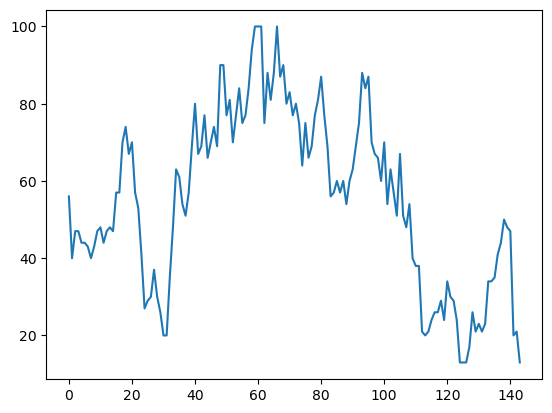

In [9]:
plt.plot(y1)

In [10]:
df_tmp = df_new.loc[(df['VideoID'] == 5) & (df['SubjectID'] == 0)]
df_tmp

,SubjectID,VideoID,Attention,user-definedlabeln
664,0.0,5.0,0.0,1.0
665,0.0,5.0,0.0,1.0
666,0.0,5.0,38.0,1.0
667,0.0,5.0,24.0,1.0
668,0.0,5.0,14.0,1.0
...,...,...,...,...
782,0.0,5.0,93.0,1.0
783,0.0,5.0,69.0,1.0
784,0.0,5.0,80.0,1.0
785,0.0,5.0,69.0,1.0


In [11]:
y2 = df_tmp[COL].values

In [12]:
c = 0
x2 = []
for i in range(len(y2)):
    x2.append(c)
    c += 0.5

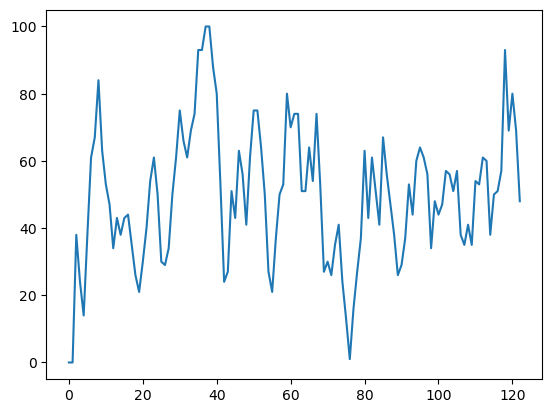

In [13]:
plt.plot(y2)

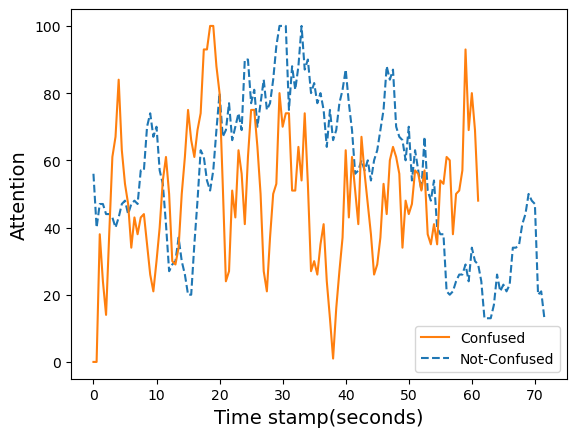

In [23]:
fig, ax = plt.subplots()

line1, = ax.plot(x1, y1, '--', label ="Not-Confused")
line2, = ax.plot(x2, y2, '', label ="Confused")
ax.legend(handles =[line2, line1], loc ='lower right')
plt.xlabel("Time stamp(seconds)", fontsize=14)
plt.ylabel(COL, fontsize=14)
plt.show()

In [15]:
COL

'Attention'

# GASF, GADF

In [16]:
gasf = GramianAngularField(image_size=120, method='summation')
gadf = GramianAngularField(image_size=120, method='difference')

## Not Confused

In [17]:
X_Gasf = gasf.fit_transform(y1.reshape(1, -1))
X_Gadf = gadf.fit_transform(y1.reshape(1, -1))

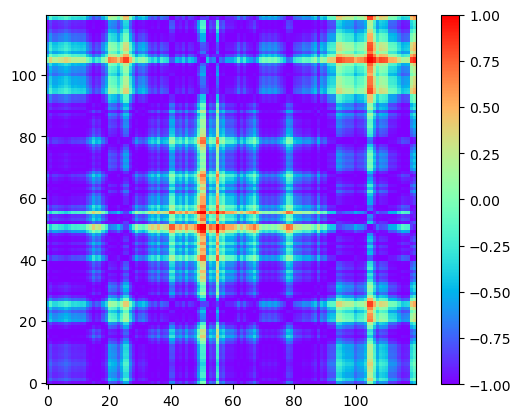

In [18]:
plt.imshow(X_Gasf[0], cmap='rainbow', origin='lower')
plt.colorbar()

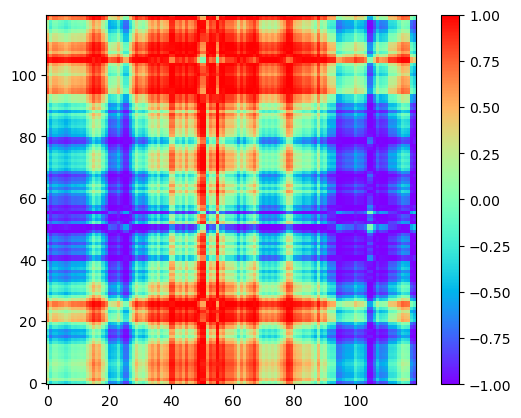

In [19]:
plt.imshow(X_Gadf[0], cmap='rainbow', origin='lower')
plt.colorbar()

## Confused

In [20]:
X_gasf = gasf.fit_transform(y2.reshape(1, -1))
X_gadf = gadf.fit_transform(y2.reshape(1, -1))

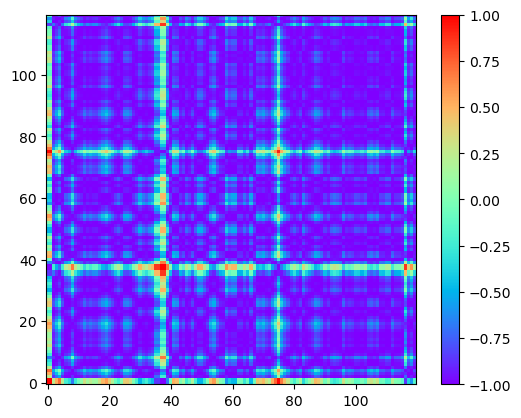

In [21]:
plt.imshow(X_gasf[0], cmap='rainbow', origin='lower')
plt.colorbar()

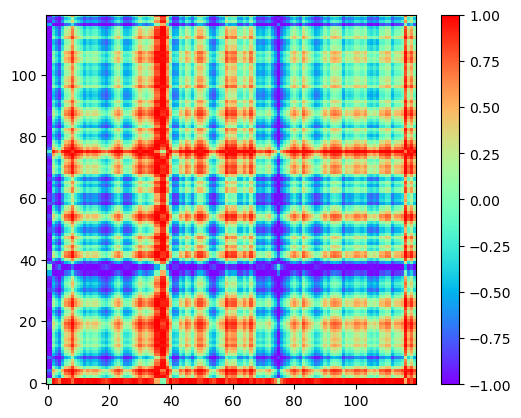

In [22]:
plt.imshow(X_gadf[0], cmap='rainbow', origin='lower')
plt.colorbar()